In [1]:
#Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Data

books=pd.read_csv('Books.csv')
ratings=pd.read_csv('Ratings.csv')
users=pd.read_csv('Users.csv')

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
print("Shape of the Books : ",books.shape)
print("Shape of the Ratings : ",ratings.shape)
print("Shape of the Users : ",users.shape)

Shape of the Books :  (271360, 8)
Shape of the Ratings :  (1149780, 3)
Shape of the Users :  (278858, 3)


In [7]:
print("Data Type for Books :\n",books.dtypes)
print("\nData Type for Ratings :\n",ratings.dtypes)
print("\nData Type for Users :\n",users.dtypes)

Data Type for Books :
 ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

Data Type for Ratings :
 User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

Data Type for Users :
 User-ID       int64
Location     object
Age         float64
dtype: object


In [8]:
books[books.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [9]:
ratings[ratings.duplicated()]

,User-ID,ISBN,Book-Rating


In [10]:
users[users.duplicated()]

,User-ID,Location,Age


In [11]:
#Merging datasets users and ratings based on 'Used-ID'
user_rating=pd.merge(users,ratings,on='User-ID')
user_rating.head()

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,7,"washington, dc, usa",NaN,034542252,0
2,8,"timmins, ontario, canada",NaN,0002005018,5
3,8,"timmins, ontario, canada",NaN,0060973129,0
4,8,"timmins, ontario, canada",NaN,0374157065,0


In [12]:
#Merging datasets user_rating and books based on 'ISBN'
user_book_rating=pd.merge(user_rating,books,on='ISBN')
user_book_rating.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,11676,"n/a, n/a, n/a",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,41385,"sudbury, ontario, canada",NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [13]:
user_book_rating.shape

(1031136, 12)

In [14]:
user_book_rating.isna().sum().sort_values(ascending=True)

User-ID                     0
Location                    0
ISBN                        0
Book-Rating                 0
Book-Title                  0
Year-Of-Publication         0
Image-URL-S                 0
Image-URL-M                 0
Book-Author                 1
Publisher                   2
Image-URL-L                 4
Age                    277835
dtype: int64

In [15]:
user_book_rating.isna().sum().sort_values(ascending=True)/len(ratings)*100

User-ID                 0.000000
Location                0.000000
ISBN                    0.000000
Book-Rating             0.000000
Book-Title              0.000000
Year-Of-Publication     0.000000
Image-URL-S             0.000000
Image-URL-M             0.000000
Book-Author             0.000087
Publisher               0.000174
Image-URL-L             0.000348
Age                    24.164188
dtype: float64

In [16]:
user_book_rating.dtypes

User-ID                  int64
Location                object
Age                    float64
ISBN                    object
Book-Rating              int64
Book-Title              object
Book-Author             object
Year-Of-Publication     object
Publisher               object
Image-URL-S             object
Image-URL-M             object
Image-URL-L             object
dtype: object

In [17]:
user_book_rating[user_book_rating.duplicated()]

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [18]:
user_book_rating.describe().round(2)

,User-ID,Age,Book-Rating
count,1031136.00,753301.0,1031136.00
mean,140594.50,37.4,2.84
std,80524.66,14.1,3.85
min,2.00,0.0,0.00
25%,70415.00,28.0,0.00
50%,141210.00,35.0,0.00
75%,211426.00,45.0,7.00
max,278854.00,244.0,10.00


In [19]:
# df_left=pd.merge(user_rating,books,on='ISBN',how='left')
# missed=df_left[df_left['Book-Title'].isnull()]
# missed=missed.reset_index(drop=True)
# missed['ISBN'].sort_values().tail(50)

In [20]:
# %%time
# fixed_isbn=pd.DataFrame(columns=['Index','Wrong_ISBN','Correct_ISBN'])
# for num in range(len(missed)):
#     if not books[books['ISBN'].str.contains(re.sub(r'[^\w\s]', '', missed['ISBN'][num]))].empty:
#         fixed_isbn=fixed_isbn.append({'Index':num,'Wrong_ISBN':missed['ISBN'][num],'Correct_ISBN':books[books['ISBN'].str.contains(re.sub(r'[^\w\s]', '', missed['ISBN'][num]))].reset_index().iloc[0].at['ISBN']},ignore_index=True)
# fixed_isbn

### Data Cleaning/Preparation

In [21]:
#Replace hyphen with underscore

user_book_rating=user_book_rating.rename(columns = {'User-ID':'User_ID','Book-Rating':'Book_Rating','Book-Title':'Book_Title',
                                  'Book-Author':'Book_Author','Year-Of-Publication':'Year_Of_Publication',
                                  'Image-URL-S':'Image_URL_S', 'Image-URL-M':'Image_URL_M','Image-URL-L':'Image_URL_L'})
user_book_rating.head(2)

,User_ID,Location,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


#### Handling feature 'Book Author'

In [22]:
user_book_rating[user_book_rating['Book_Author'].isnull()]

,User_ID,Location,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
857604,98647,"selayang, selangor, malaysia",26.0,9627982032,8,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [23]:
index_nan_book_author=user_book_rating[user_book_rating['Book_Author'].isnull()].index[0]

In [24]:
user_book_rating.drop(index=index_nan_book_author,axis=0,inplace=True)

#### Handling feature 'Publisher'

In [25]:
user_book_rating[user_book_rating['Publisher'].isnull()]

,User_ID,Location,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
857163,98391,"morrow, georgia, usa",52.0,193169656X,9,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
857174,98391,"morrow, georgia, usa",52.0,1931696993,9,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [26]:
user_book_rating.loc[(user_book_rating.ISBN == '193169656X'),'Publisher'] = 'NovelBooks'
user_book_rating.loc[(user_book_rating.ISBN == '1931696993'),'Publisher'] = 'CreateSpace Independent Publishing Platform'

In [27]:
user_book_rating[user_book_rating['Publisher'].isnull()]

,User_ID,Location,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L


#### Handling feature 'Image_URL_L'

In [28]:
user_book_rating[user_book_rating['Image_URL_L'].isnull()]

,User_ID,Location,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
906829,130571,"summerville, south carolina, usa",NaN,0789466953,0,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN
913994,137190,"rennes, bretagne, france",31.0,2070426769,0,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
946370,169663,"towson, maryland, usa",NaN,078946697X,0,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
946371,227771,"savion, n/a, israel",19.0,078946697X,7,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN


In [29]:
new= user_book_rating[user_book_rating["Image_URL_L"].isnull()]
yop=new["Book_Author"].values
p= new["Year_Of_Publication"].values
s=new["Publisher"].values
m=new["Image_URL_S"].values
l=new["Image_URL_M"].values
na=new["Image_URL_L"].values

In [30]:
isbn=user_book_rating[user_book_rating["Image_URL_L"].isnull()]["ISBN"]
isbn.index

Int64Index([906829, 913994, 946370, 946371], dtype='int64')

In [31]:
user_book_rating.loc[isbn.index[0],"Book_Author"]='Buckley Jr., James'
user_book_rating.loc[isbn.index[1],"Book_Author"]='Le Clezio, Jean-Marie Gustave'
user_book_rating.loc[isbn.index[2],"Book_Author"]='Teitelbaum, Michael'
user_book_rating.loc[isbn.index[2],"Book_Author"]='Teitelbaum, Michael'

In [32]:
for i in range (len(isbn)):
    x=user_book_rating.index[user_book_rating["ISBN"]==isbn.values[i]]
    user_book_rating.loc[x,"Year_Of_Publication"]=yop[i]
    user_book_rating.loc[x,"Publisher"]=p[i]
    user_book_rating.loc[x,"Image_URL_S"]=s[i] 
    user_book_rating.loc[x,"Image_URL_M"]=m[i]
    user_book_rating.loc[x,"Image_URL_L"]=l[i]

In [33]:
user_book_rating[user_book_rating['Image_URL_L'].isnull()]

,User_ID,Location,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L


In [34]:
user_book_rating.isnull().sum()

User_ID                     0
Location                    0
Age                    277835
ISBN                        0
Book_Rating                 0
Book_Title                  0
Book_Author                 0
Year_Of_Publication         0
Publisher                   0
Image_URL_S                 0
Image_URL_M                 0
Image_URL_L                 0
dtype: int64

#### Handling feature - Age

In [35]:
print(sorted(user_book_rating.Age.unique()))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 18.0, nan, 13.0, 14.0, 15.0, 16.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 89.0, 90.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 103.0, 104.0, 105.0, 107.0, 108.0, 109.0, 114.0, 116.0, 118.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 138.0, 140.0, 141.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 168.0, 199.0, 200.0, 201.0, 204.0, 209.0, 212.0, 219.0, 220.0, 223.0, 226.0, 228.0, 229.0, 237.0, 239.0, 244.0]


In [36]:
len(user_book_rating.loc[(user_book_rating.Age > 90) | (user_book_rating.Age < 5), 'Age'])

4979

In [37]:
user_book_rating.loc[(user_book_rating.Age > 90) | (user_book_rating.Age < 5), 'Age'] = np.nan

In [38]:
user_book_rating.isnull().sum()

User_ID                     0
Location                    0
Age                    282814
ISBN                        0
Book_Rating                 0
Book_Title                  0
Book_Author                 0
Year_Of_Publication         0
Publisher                   0
Image_URL_S                 0
Image_URL_M                 0
Image_URL_L                 0
dtype: int64

In [39]:
user_book_rating.Age.median()

35.0

In [40]:
user_book_rating['Age']=user_book_rating['Age'].fillna(user_book_rating.Age.median()).astype('int32')

In [41]:
user_book_rating.isnull().sum()

User_ID                0
Location               0
Age                    0
ISBN                   0
Book_Rating            0
Book_Title             0
Book_Author            0
Year_Of_Publication    0
Publisher              0
Image_URL_S            0
Image_URL_M            0
Image_URL_L            0
dtype: int64

#### Handling feature - Year of Publication

In [42]:
user_book_rating.Year_Of_Publication.dtype

dtype('O')

In [43]:
user_book_rating.Year_Of_Publication=pd.to_numeric(arg=user_book_rating.Year_Of_Publication,errors='coerce')

In [44]:
print(sorted(user_book_rating.Year_Of_Publication.unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [45]:
len(user_book_rating.loc[(user_book_rating.Year_Of_Publication > 2006) | (user_book_rating.Year_Of_Publication ==0), 'Year_Of_Publication'])

14089

In [46]:
user_book_rating.loc[(user_book_rating.Year_Of_Publication > 2006) | (user_book_rating.Year_Of_Publication ==0), 'Year_Of_Publication'] = np.nan

In [47]:
user_book_rating.isnull().sum()

User_ID                    0
Location                   0
Age                        0
ISBN                       0
Book_Rating                0
Book_Title                 0
Book_Author                0
Year_Of_Publication    14089
Publisher                  0
Image_URL_S                0
Image_URL_M                0
Image_URL_L                0
dtype: int64

In [48]:
user_book_rating.Year_Of_Publication.median()

1997.0

In [49]:
user_book_rating['Year_Of_Publication']=user_book_rating['Year_Of_Publication'].fillna(user_book_rating.Year_Of_Publication.median()).astype('int32')

In [50]:
user_book_rating.isnull().sum()

User_ID                0
Location               0
Age                    0
ISBN                   0
Book_Rating            0
Book_Title             0
Book_Author            0
Year_Of_Publication    0
Publisher              0
Image_URL_S            0
Image_URL_M            0
Image_URL_L            0
dtype: int64

In [51]:
user_book_rating.head()

,User_ID,Location,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,2,"stockton, california, usa",18,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",35,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,11400,"ottawa, ontario, canada",49,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,11676,"n/a, n/a, n/a",35,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,41385,"sudbury, ontario, canada",35,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


### Data Visualization

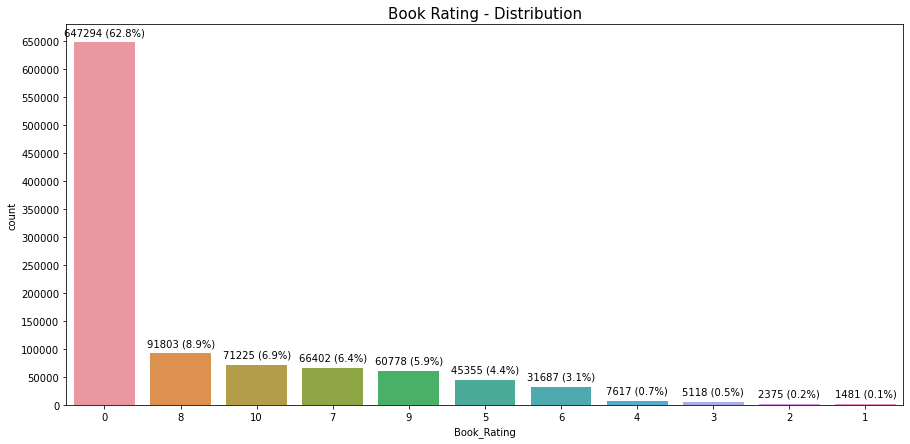

In [52]:
plt.figure(figsize=(15,7))
ax=sns.countplot(user_book_rating['Book_Rating'],order=user_book_rating['Book_Rating'].value_counts().index)
abs_values=user_book_rating['Book_Rating'].value_counts().values
rel_values=user_book_rating['Book_Rating'].value_counts(normalize=True).values*100
labels=[f'{p[0]} ({p[1]:.1f}%)' for p in zip(abs_values,rel_values)]    
ax.bar_label(container=ax.containers[0],labels=labels,padding=5)
plt.yticks(np.arange(0, 700000, step=50000))
plt.title('Book Rating - Distribution',size=15)
plt.show()

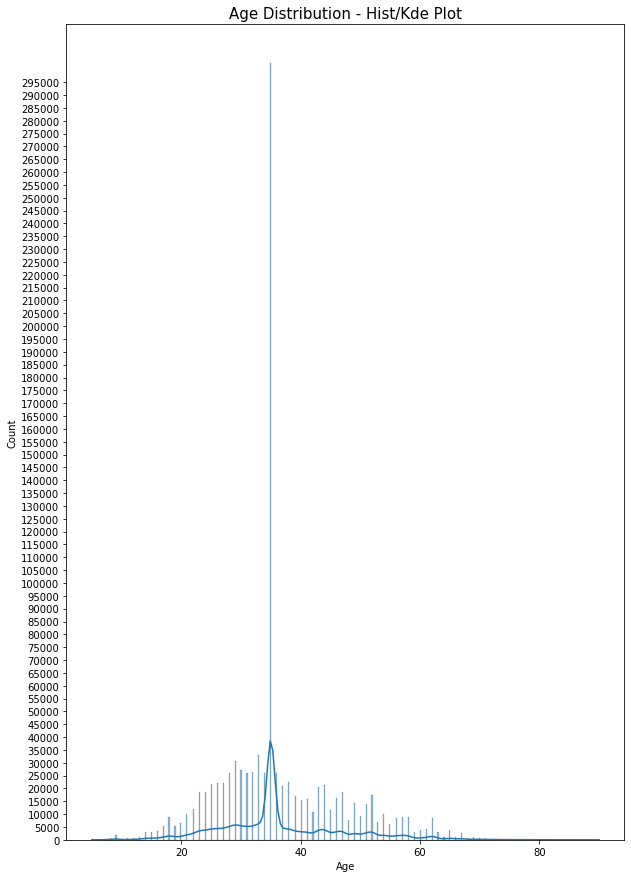

In [53]:
plt.figure(figsize=(10,15))
sns.histplot(user_book_rating['Age'],kde=True)
plt.yticks(np.arange(0, 300000, step=5000))
plt.title('Age Distribution - Hist/Kde Plot',size=15)
plt.show()

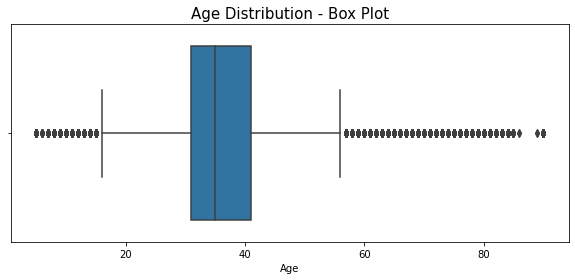

In [54]:
plt.figure(figsize=(10,4))
sns.boxplot(user_book_rating['Age'])
plt.title('Age Distribution - Box Plot',size=15)
plt.show()

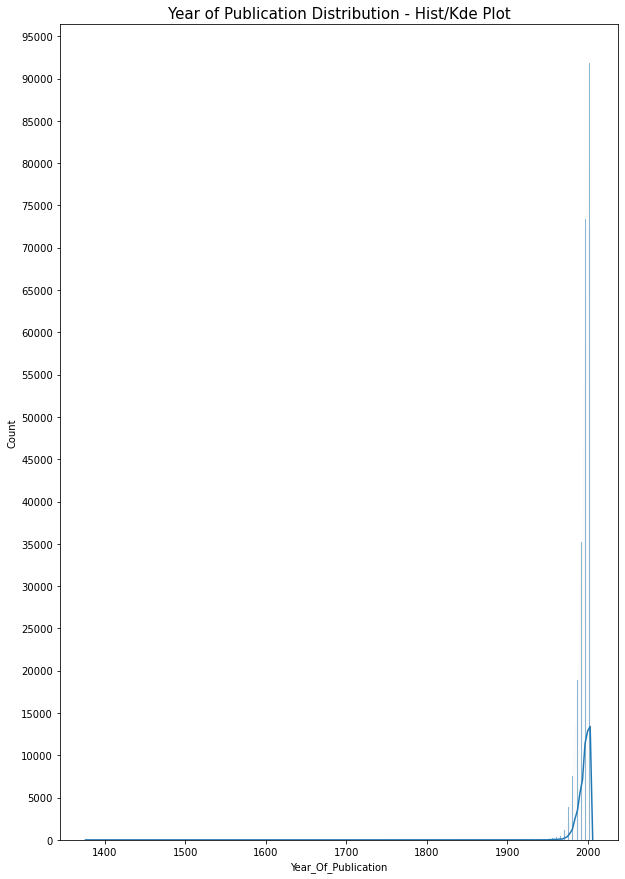

In [55]:
plt.figure(figsize=(10,15))
sns.histplot(user_book_rating['Year_Of_Publication'],kde=True)
plt.yticks(np.arange(0, 100000, step=5000))
plt.title('Year of Publication Distribution - Hist/Kde Plot',size=15)
plt.show()

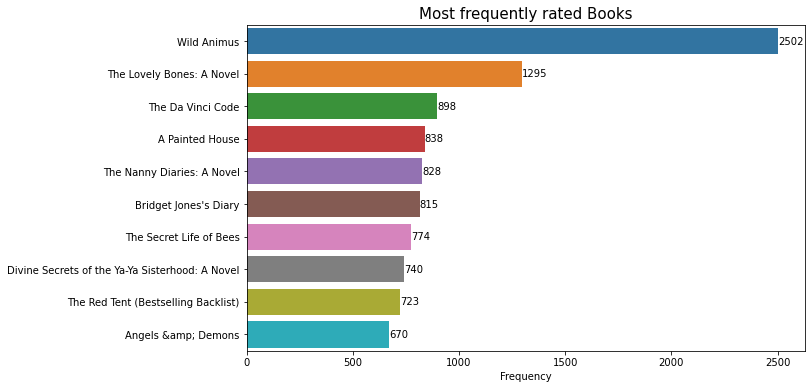

In [56]:
plt.figure(figsize=(10,6))
book_freq=user_book_rating['Book_Title'].value_counts().head(10)
ax=sns.barplot(book_freq,book_freq.index,orient='h')
abs_values=book_freq.values   
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.xlabel('Frequency')
plt.title('Most frequently rated Books',size=15)
plt.show()

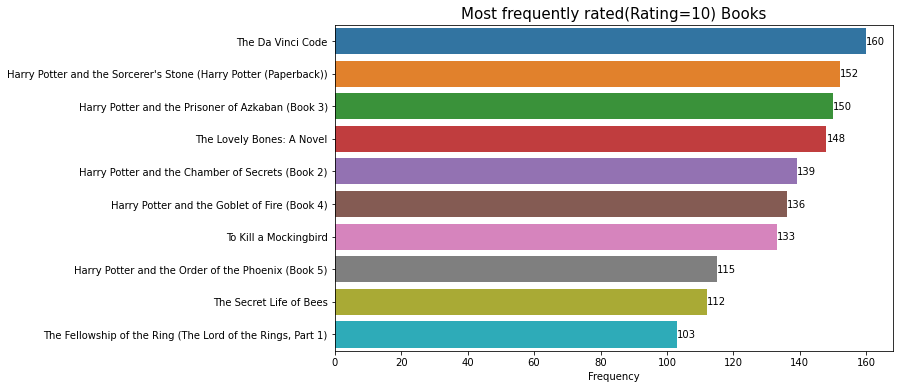

In [57]:
plt.figure(figsize=(10,6))
book_rating_freq=user_book_rating[user_book_rating['Book_Rating']==10]['Book_Title'].value_counts().head(10)
ax=sns.barplot(book_rating_freq,book_rating_freq.index,orient='h')
abs_values=book_rating_freq.values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.xlabel('Frequency')
plt.title('Most frequently rated(Rating=10) Books',size=15)
plt.show()

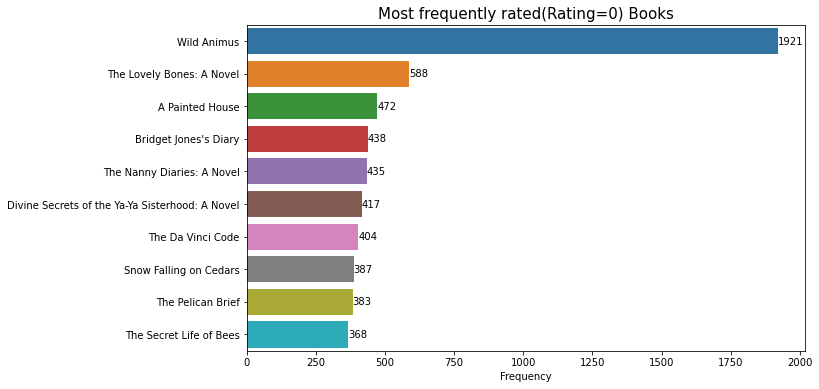

In [58]:
plt.figure(figsize=(10,6))
book_rating_freq=user_book_rating[user_book_rating['Book_Rating']==0]['Book_Title'].value_counts().head(10)
ax=sns.barplot(book_rating_freq,book_rating_freq.index,orient='h')
abs_values=book_rating_freq.values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.xlabel('Frequency')
plt.title('Most frequently rated(Rating=0) Books',size=15)
plt.show()

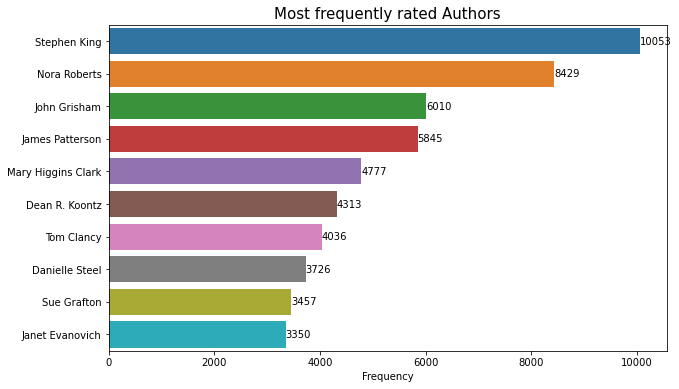

In [59]:
plt.figure(figsize=(10,6))
book_freq=user_book_rating['Book_Author'].value_counts().head(10)
ax=sns.barplot(book_freq,book_freq.index,orient='h')
abs_values=book_freq.values   
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.xlabel('Frequency')
plt.title('Most frequently rated Authors',size=15)
plt.show()

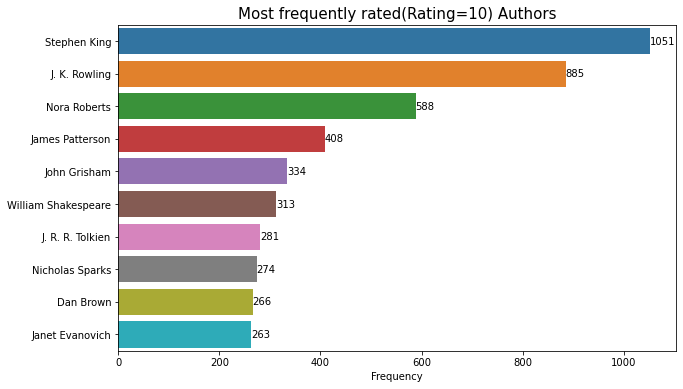

In [60]:
plt.figure(figsize=(10,6))
book_rating_freq=user_book_rating[user_book_rating['Book_Rating']==10]['Book_Author'].value_counts().head(10)
ax=sns.barplot(book_rating_freq,book_rating_freq.index,orient='h')
abs_values=book_rating_freq.values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.xlabel('Frequency')
plt.title('Most frequently rated(Rating=10) Authors',size=15)
plt.show()

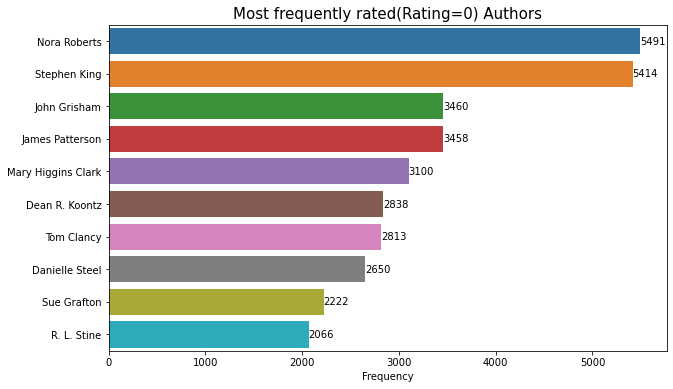

In [61]:
plt.figure(figsize=(10,6))
book_rating_freq=user_book_rating[user_book_rating['Book_Rating']==0]['Book_Author'].value_counts().head(10)
ax=sns.barplot(book_rating_freq,book_rating_freq.index,orient='h')
abs_values=book_rating_freq.values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.xlabel('Frequency')
plt.title('Most frequently rated(Rating=0) Authors',size=15)
plt.show()

## -------------------------------------------------------------------------------------------------------------##

### Splitting data by book rating by implicit and explicit

In [62]:
df_implicit=user_book_rating[user_book_rating['Book_Rating']==0]
df_implicit.shape

(647294, 12)

In [63]:
df_explicit=user_book_rating[user_book_rating['Book_Rating']!=0]
df_explicit.shape

(383841, 12)

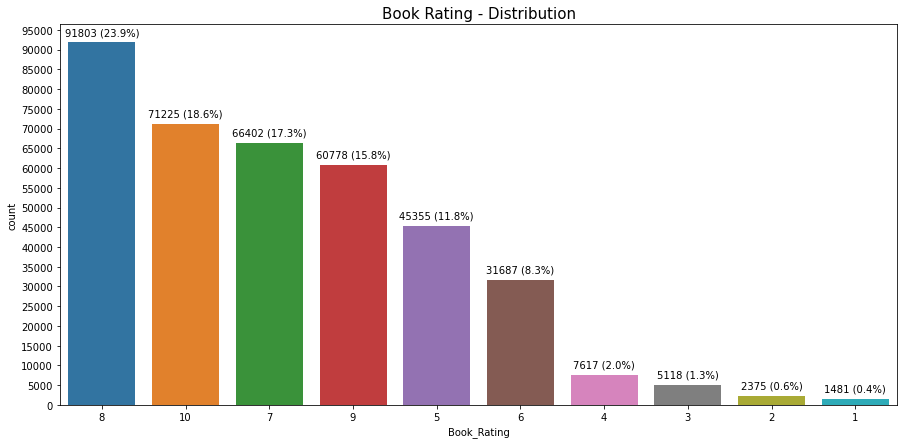

In [64]:
plt.figure(figsize=(15,7))
ax=sns.countplot(df_explicit['Book_Rating'],order=df_explicit['Book_Rating'].value_counts().index)
abs_values=df_explicit['Book_Rating'].value_counts().values
rel_values=df_explicit['Book_Rating'].value_counts(normalize=True).values*100
labels=[f'{p[0]} ({p[1]:.1f}%)' for p in zip(abs_values,rel_values)]    
ax.bar_label(container=ax.containers[0],labels=labels,padding=5)
plt.yticks(np.arange(0, 100000, step=5000))
plt.title('Book Rating - Distribution',size=15)
plt.show()

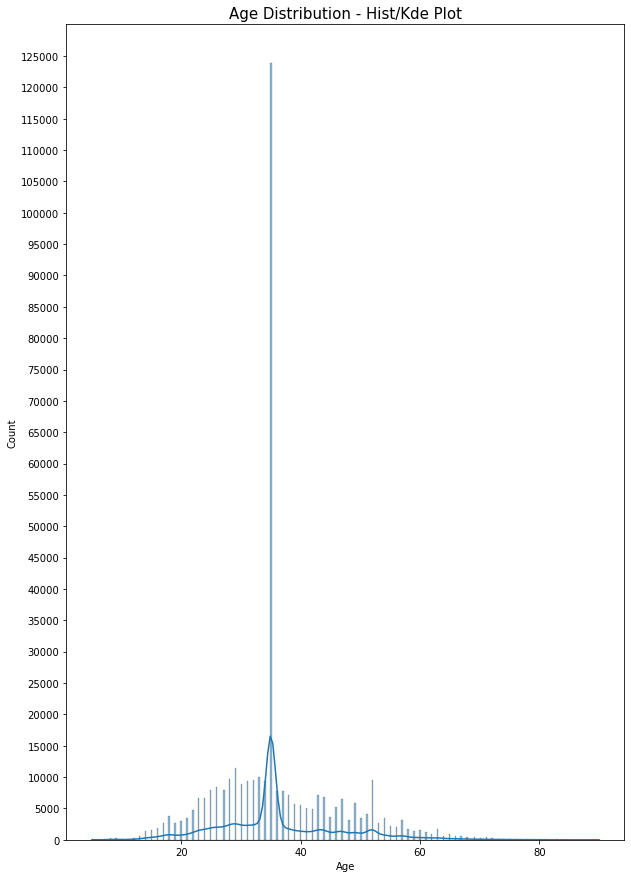

In [65]:
plt.figure(figsize=(10,15))
sns.histplot(df_explicit['Age'],kde=True)
plt.yticks(np.arange(0, 130000, step=5000))
plt.title('Age Distribution - Hist/Kde Plot',size=15)
plt.show()

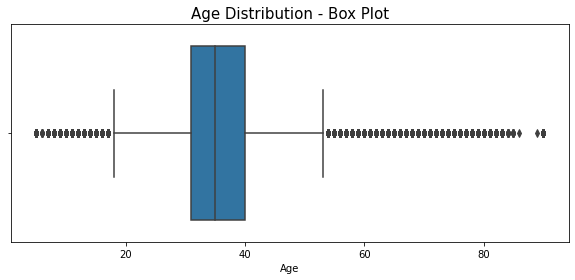

In [66]:
plt.figure(figsize=(10,4))
sns.boxplot(df_explicit['Age'])
plt.title('Age Distribution - Box Plot',size=15)
plt.show()

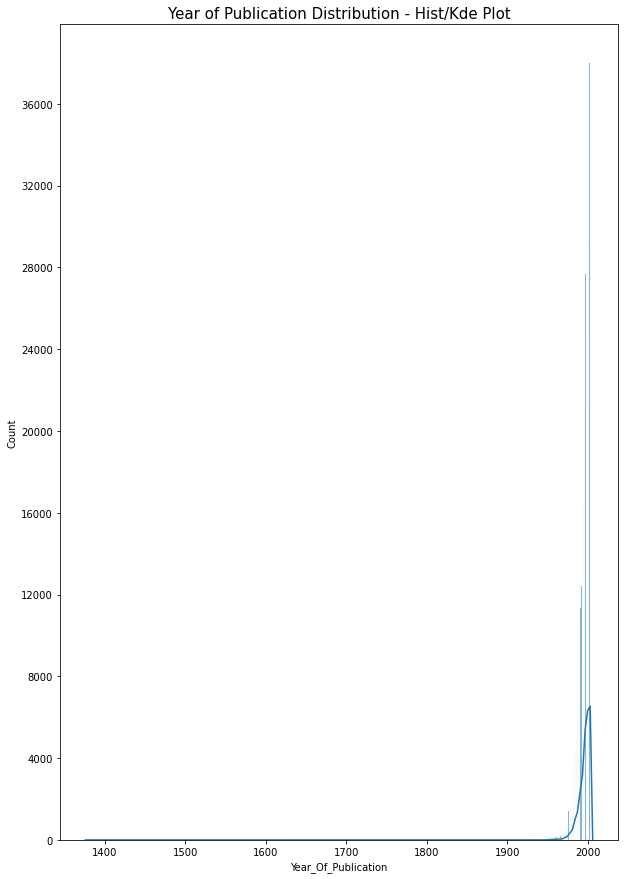

In [67]:
plt.figure(figsize=(10,15))
sns.histplot(df_explicit['Year_Of_Publication'],kde=True)
plt.yticks(np.arange(0, 40000, step=4000))
plt.title('Year of Publication Distribution - Hist/Kde Plot',size=15)
plt.show()

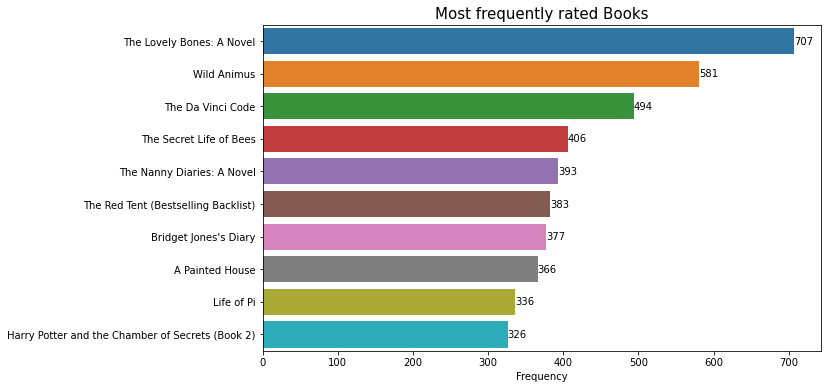

In [68]:
plt.figure(figsize=(10,6))
book_freq=df_explicit['Book_Title'].value_counts().head(10)
ax=sns.barplot(book_freq,book_freq.index,orient='h')
abs_values=book_freq.values   
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.xlabel('Frequency')
plt.title('Most frequently rated Books',size=15)
plt.show()

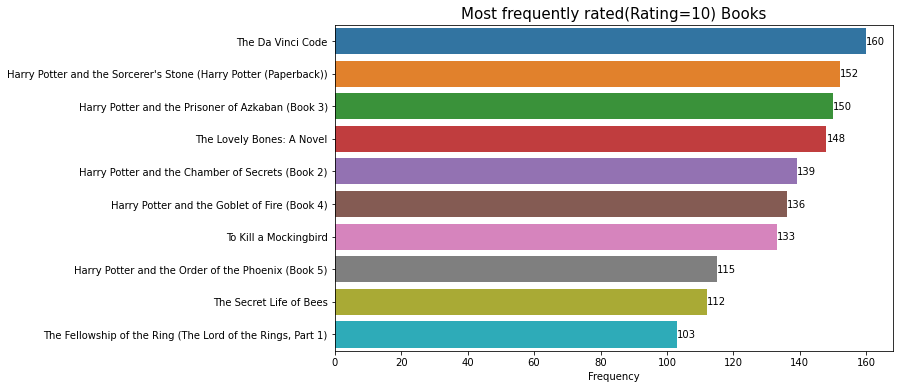

In [69]:
plt.figure(figsize=(10,6))
book_rating_freq=df_explicit[df_explicit['Book_Rating']==10]['Book_Title'].value_counts().head(10)
ax=sns.barplot(book_rating_freq,book_rating_freq.index,orient='h')
abs_values=book_rating_freq.values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.xlabel('Frequency')
plt.title('Most frequently rated(Rating=10) Books',size=15)
plt.show()

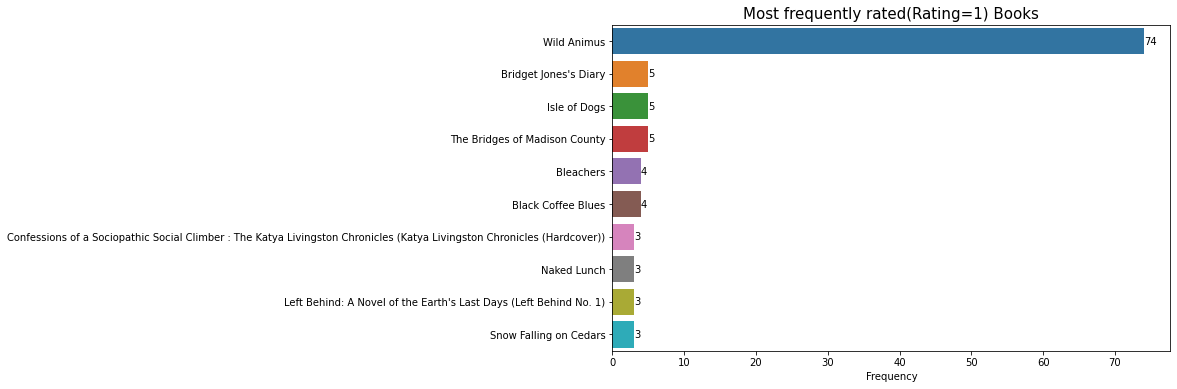

In [70]:
plt.figure(figsize=(10,6))
book_rating_freq=df_explicit[df_explicit['Book_Rating']==1]['Book_Title'].value_counts().head(10)
ax=sns.barplot(book_rating_freq,book_rating_freq.index,orient='h')
abs_values=book_rating_freq.values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.xlabel('Frequency')
plt.title('Most frequently rated(Rating=1) Books',size=15)
plt.show()

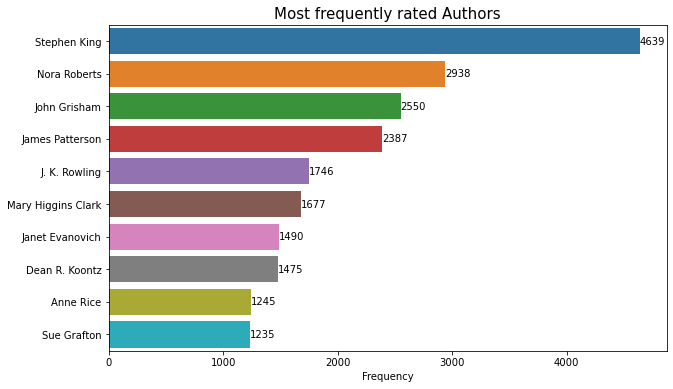

In [71]:
plt.figure(figsize=(10,6))
book_freq=df_explicit['Book_Author'].value_counts().head(10)
ax=sns.barplot(book_freq,book_freq.index,orient='h')
abs_values=book_freq.values   
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.xlabel('Frequency')
plt.title('Most frequently rated Authors',size=15)
plt.show()

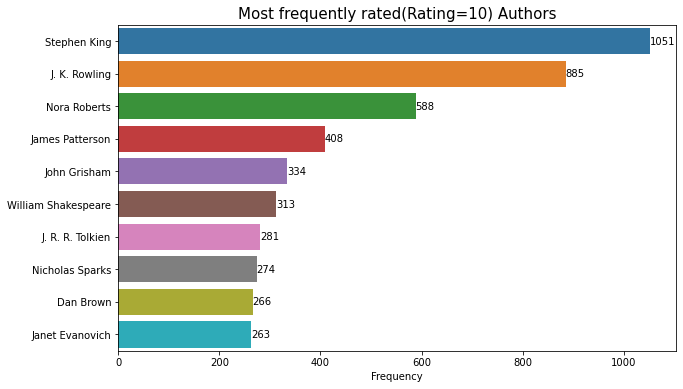

In [72]:
plt.figure(figsize=(10,6))
book_rating_freq=df_explicit[df_explicit['Book_Rating']==10]['Book_Author'].value_counts().head(10)
ax=sns.barplot(book_rating_freq,book_rating_freq.index,orient='h')
abs_values=book_rating_freq.values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.xlabel('Frequency')
plt.title('Most frequently rated(Rating=10) Authors',size=15)
plt.show()

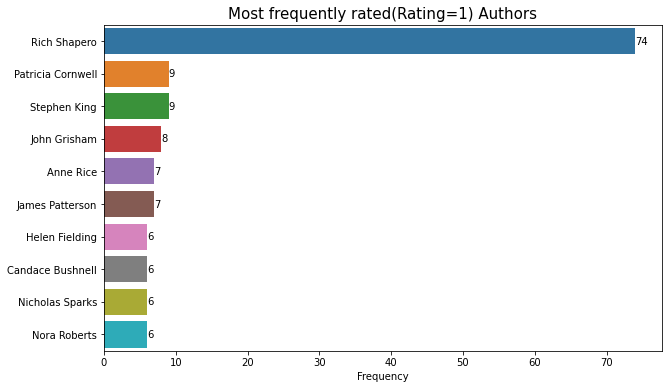

In [73]:
plt.figure(figsize=(10,6))
book_rating_freq=df_explicit[df_explicit['Book_Rating']==1]['Book_Author'].value_counts().head(10)
ax=sns.barplot(book_rating_freq,book_rating_freq.index,orient='h')
abs_values=book_rating_freq.values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.xlabel('Frequency')
plt.title('Most frequently rated(Rating=1) Authors',size=15)
plt.show()

### End !!!